Guck Dir die Datei Immobilien.xlsx an, erstelle daraus ein DataFrame und beantworte
folgende Fragen:

**Aufgabe 1**\
Datentypen und Skalenniveaus für die folgenden Variablen bestimmen: Kunden-ID,
Finanzierung, Verkaufsjahr

In [ ]:
#import aller benötiger Bibliotheken
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy



In [ ]:
#Lesen der Exceldatei:
immob=pd.read_excel('Immobilien.xlsx', 
 usecols='B:J, L:AA', header=4) # oder bei skiprows = 4 überspringen wir die ersten 4 Zeilen 
immob.head(3) #zeigt nur erste drei Zeilen





c:\Users\NataliaArchipenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,ID,Gebäude,Verkaufsjahr,Verkaufsmonat,Objektart,Objekt-Nr.,Fläche (Fuß),Preis,Status,Kunden-ID,...,Jahr,M,D,Geschlecht,Land,Bundesstaat,Zweck,Zufriedenheit,Finanzierung,Quelle
0,1030,1,2005.0,11.0,Apartment,30,743.0856,246172.6760,Verkauft,C0028,...,1986.0,6.0,21.0,F,USA,Kalifornien,Eigenheim,5.0,Nein,Website
1,1029,1,2005.0,10.0,Apartment,29,756.2128,246331.9040,Verkauft,C0027,...,1983.0,2.0,24.0,F,USA,Kalifornien,Eigenheim,5.0,Nein,Website
2,2002,2,2007.0,7.0,Apartment,2,587.2808,209280.9104,Verkauft,C0112,...,1985.0,12.0,27.0,M,USA,Kalifornien,Eigenheim,1.0,Ja,Kunde


In [164]:
#Datentypen anzeigen:
print(immob[['Kunden-ID', 'Finanzierung', 'Verkaufsjahr']].dtypes)
print('Skalenniveus für Kunden-ID und Finanzierung ist Nominalskala, da sie beide objekte sind,\nfür Verkaufsjahr - Intervallskala, da kein Nullpunkt ist und Abstand ist gleich ')

Kunden-ID        object
Finanzierung     object
Verkaufsjahr    float64
dtype: object
Skalenniveus für Kunden-ID und Finanzierung ist Nominalskala, da sie beide objekte sind,
für Verkaufsjahr - Intervallskala, da kein Nullpunkt ist und Abstand ist gleich 


**Aufgabe 2**
Stelle die Verteilung der Käufer anhand ihres Geschlechts in einem Kreisdiagram dar.
Überlege dir genau welche Kategorien Du dafür benötigst. Was können wir anhand der
Daten für eine AUssage über die Käufer treffen ?

In [ ]:
print('Variant 1 mit shape-Funktion')
anzahl_frauen= immob[immob['Geschlecht'] == 'F'].shape[0]
anzahl_maenner= immob[immob['Geschlecht'] == 'M'].shape[0]
anzahl_alle_kaeufer=immob[immob['Kundenart']=='Person'].shape[0]
print(f'Die Anzahl der Frauen ist {anzahl_frauen},\n Die Anzahl der Männern ist {anzahl_maenner},\n isgessamt = {anzahl_alle_kaeufer} Personen')

print('Variant 2 mit Maske')
gefiltert = immob[(immob['Kundenart'] == 'Person') & (immob['Status'] == 'Verkauft')]#Filtern nach Person und nur den verkauften Gebäude anzeigen.
ergebnis = gefiltert['Geschlecht'].value_counts()
print(ergebnis)

print('Variant 3 mit der Grouppierung')
ergebnis2 = gefiltert.groupby('Geschlecht').size()
print(ergebnis2)

Variant 1 mit shape-Funktion
Die Anzahl der Frauen ist 70,
 Die Anzahl der Männern ist 108,
 isgessamt = 178 Personen
Variant 2 mit Maske
Geschlecht
M    108
F     70
Name: count, dtype: int64
Variant 3 mit der Grouppierung
Geschlecht
F     70
M    108
dtype: int64


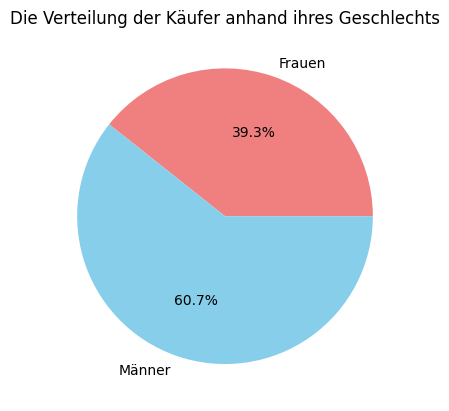

In [ ]:
#Erstellen ein Tortediagramm:
labels = ['Frauen', 'Männer']
sizes = [anzahl_frauen, anzahl_maenner]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral','skyblue'])
plt.title('Die Verteilung der Käufer anhand ihres Geschlechts')
plt.show()


**Aufgabe 3**
Stelle den Preis aller Immobilien, egal ob verkauft oder nicht, als Histogramm dar. \
  Stelle jeden unterschiedlichen Preis als eigenen “Balken” dar.

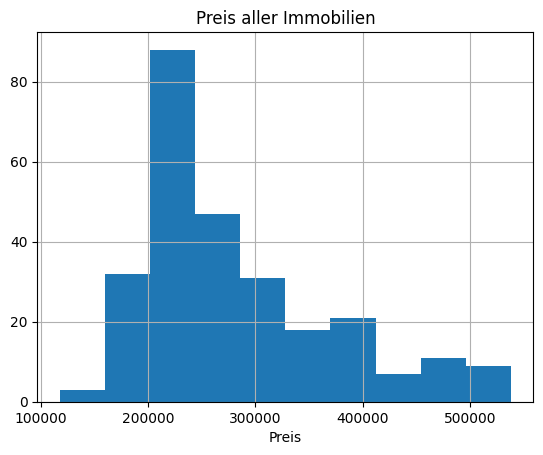

In [167]:
#Erstellen des Histogramms
preis = immob['Preis']

preis.hist()
plt.xlabel('Preis')
plt.title('Preis aller Immobilien')
plt.show()


267


Text(0, 0.5, 'Häuftikeit')

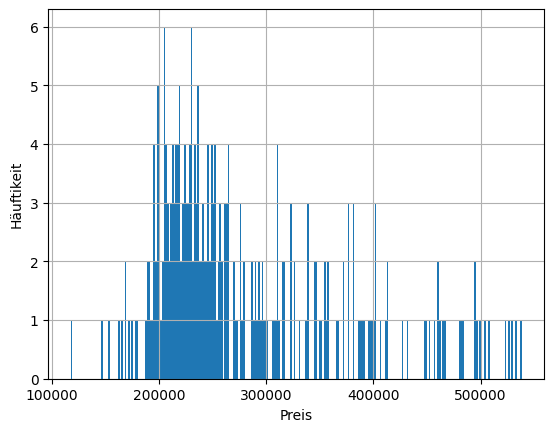

In [ ]:
#Berechnen nach der Anzahl aller Gebäude:
preis = immob['Preis']
anzahl_der_Gebäude=immob['Preis'].shape[0]
print(anzahl_der_Gebäude)

#Histogramm mit eigenen Balken für jede Preis:
preis.hist(bins = anzahl_der_Gebäude)
plt.xlabel('Preis')
plt.ylabel('Häuftikeit')

<Axes: xlabel='Preis', ylabel='Count'>

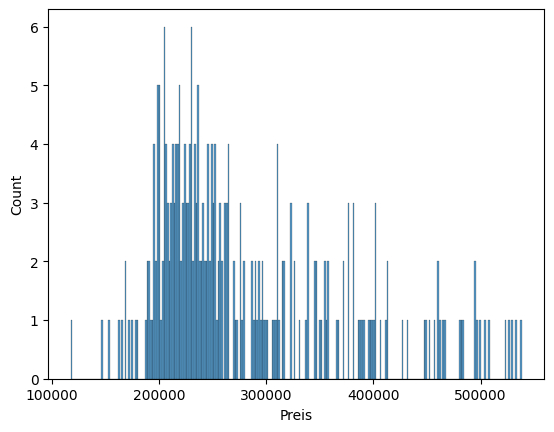

In [170]:
#gleiches Histogramm in der Bibliothek Seaborn:
sns.histplot(preis,bins=anzahl_der_Gebäude)


**Aufgabe 4**
Stelle den Preis als Histogramm mit einer Intervallbreite von 20.000 $ Dollar dar.
Benutze für das Histogramm seaborn und zeige die geschätzte Dichtefunktion an.

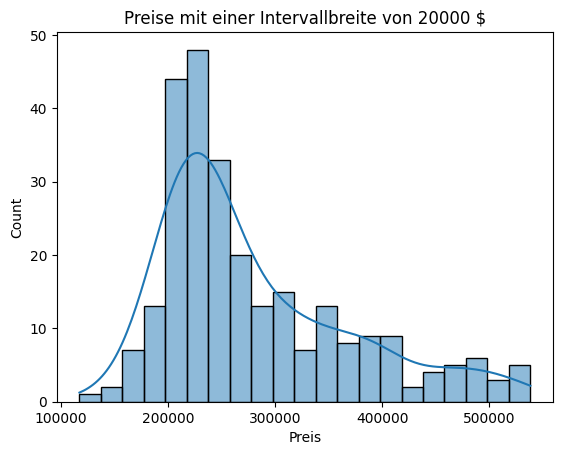

In [174]:
sns.histplot(immob['Preis'], binwidth=20000, kde=True)# binwidth steht für Intervallbreite, bei kde = True wird Dichtefunktion gezeigt 
plt.title('Preise mit einer Intervallbreite von 20000 $')
plt.show()

**Aufgabe 5**
Mittel, Median, Schiefe und Standardabweichung der Variable „Preis“ für alle Objekte
berechnen, ob verkauft oder nicht. Zeichne Mittel, Median und Stdabweichung mit
waagrechten und senkrechten Linien in das Histogramm von Aufgabe 4

In [177]:
#Mittel, Median, Schiefe und Standardabweichung der Variable „Preis“ für alle Objekte:
#sort_preis = immob['Preis'].sort_values() #nicht nötig, da ich Funktion Median nehme, die das automatisch macht
mean_preis = immob['Preis'].mean()
median_preis=immob['Preis'].median()
std_preis =immob['Preis'].std()
schiefe_preis= scipy.stats.skew(immob['Preis'])
print(f'Mittelpreis: {mean_preis:.2f}\nMedian {median_preis:.2f}\nSchiefe {schiefe_preis:.2f}\nStandardabweichung {std_preis:.2f}')

Mittelpreis: 281171.90
Median 249075.66
Schiefe 1.09
Standardabweichung 89119.12


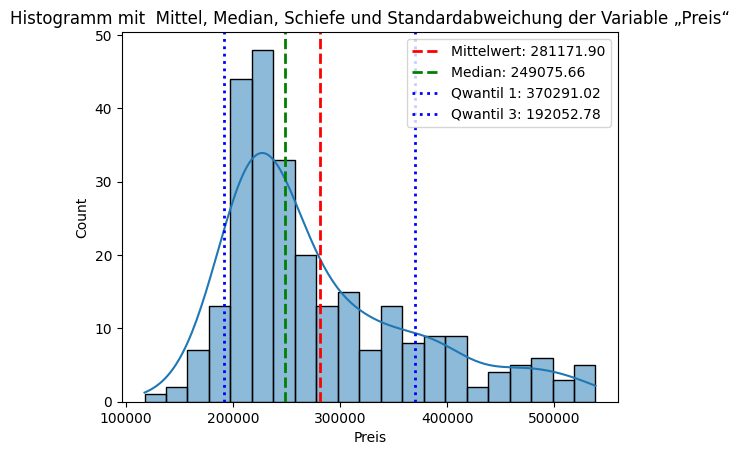

In [179]:
#Berechnen der Positionen für 
qwantil_1 = mean_preis- std_preis# -1 Standardabweichung
qwantil_3 = mean_preis + std_preis# +1 Standardabweichung

#Erstellen des Histplots: 
sns.histplot(immob['Preis'], binwidth=20000, kde=True)
plt.axvline(mean_preis , color='red', linestyle='dashed', linewidth=2, label=f'Mittelwert: {mean_preis :.2f}')
plt.axvline(median_preis, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_preis:.2f}')
plt.axvline(qwantil_3, color='blue', linestyle='dotted', linewidth=2, label=f'Qwantil 1: {qwantil_3:.2f}')
plt.axvline(qwantil_1, color='blue', linestyle='dotted', linewidth=2, label=f'Qwantil 3: {qwantil_1:.2f}')
plt.legend()
plt.title('Histogramm mit  Mittel, Median, Schiefe und Standardabweichung der Variable „Preis“')
plt.show()

**Aufgabe 6**
Stelle den Preis und die Fläche aller Objekte als Punktdiagramm dar und berechne die
Korrelation der beiden Werte.

<Axes: xlabel='Fläche (Fuß)', ylabel='Preis'>

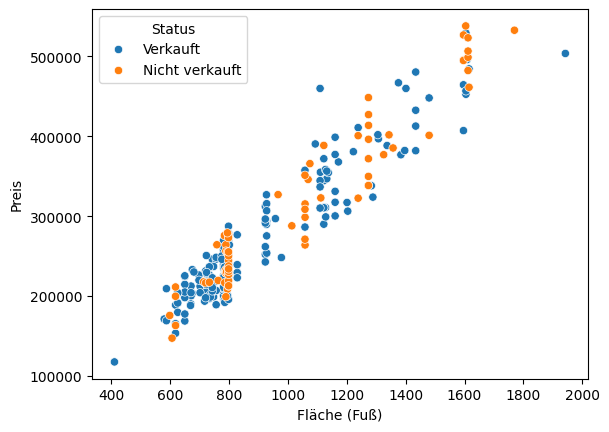

In [114]:
immob['Status']=immob['Status'].fillna('Nicht verkauft')
preis = immob['Preis']
flaeche = immob['Fläche (Fuß)']
data=immob[['Preis', 'Fläche (Fuß)']]
sns.scatterplot(data=immob, y=preis,x=flaeche, hue='Status')



Die Korrelation ist 0.95


Text(0.5, 1.0, 'Korrelationsmatrix')

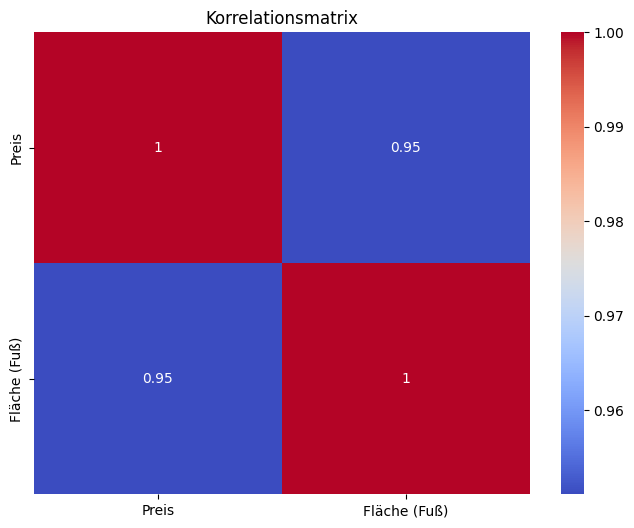

In [117]:
data=immob[['Preis', 'Fläche (Fuß)']]
correlation_matrix=data.corr()
print(f'Die Korrelation ist {correlation_matrix['Preis']['Fläche (Fuß)']:.2f}')

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')

**Aufgabe 7**
Berechne die absolute, relative und kumulative Häufigkeit (np.cumsum für kummulierte
Häufigkeit, siehe Internet ;) aller Länder in denen Käufer eine Immobilie erworben
haben. Erstelle ein Balkendiagramm der Länder, nach Häufigkeit sortiert.

In [ ]:
absolut_haueftigkeit= immob['Land'].value_counts()

alle_laender= immob['Land'].value_counts().sum()#anzahl aller Länder,die in Tabelle stehen

relative_h= absolut_haueftigkeit*100/alle_laender #Berechnen in %

kumulative_h= np.cumsum(relative_h)

print('Absolute Häuftigkeit der Länder:')
print(absolut_haueftigkeit)
print('Relative Häuftigkeit der länder:')
print(relative_h)
print('Die kummulierte Häuftigkeit:')
print(kumulative_h)


Absolute Häuftigkeit der Länder:
Land
USA            177
Kanada           7
Russland         4
England          2
Belgien          2
Dänemark         1
Deutschland      1
Mexiko           1
Name: count, dtype: int64
Relative Häuftigkeit der länder:
Land
USA            90.769231
Kanada          3.589744
Russland        2.051282
England         1.025641
Belgien         1.025641
Dänemark        0.512821
Deutschland     0.512821
Mexiko          0.512821
Name: count, dtype: float64
Die kummulierte Häuftigkeit:
Land
USA             90.769231
Kanada          94.358974
Russland        96.410256
England         97.435897
Belgien         98.461538
Dänemark        98.974359
Deutschland     99.487179
Mexiko         100.000000
Name: count, dtype: float64


In [147]:
h_tabelle = pd.DataFrame({'Absolute Häuftigkeit':absolut_haueftigkeit, 'Relative Häuftigkeit': relative_h, 'Kummuliertes Prozent': kumulative_h})
h_tabelle=h_tabelle.reset_index()
h_tabelle

,Land,Absolute Häuftigkeit,Relative Häuftigkeit,Kummuliertes Prozent
0,USA,177,90.769231,90.769231
1,Kanada,7,3.589744,94.358974
2,Russland,4,2.051282,96.410256
3,England,2,1.025641,97.435897
4,Belgien,2,1.025641,98.461538
5,Dänemark,1,0.512821,98.974359
6,Deutschland,1,0.512821,99.487179
7,Mexiko,1,0.512821,100.000000


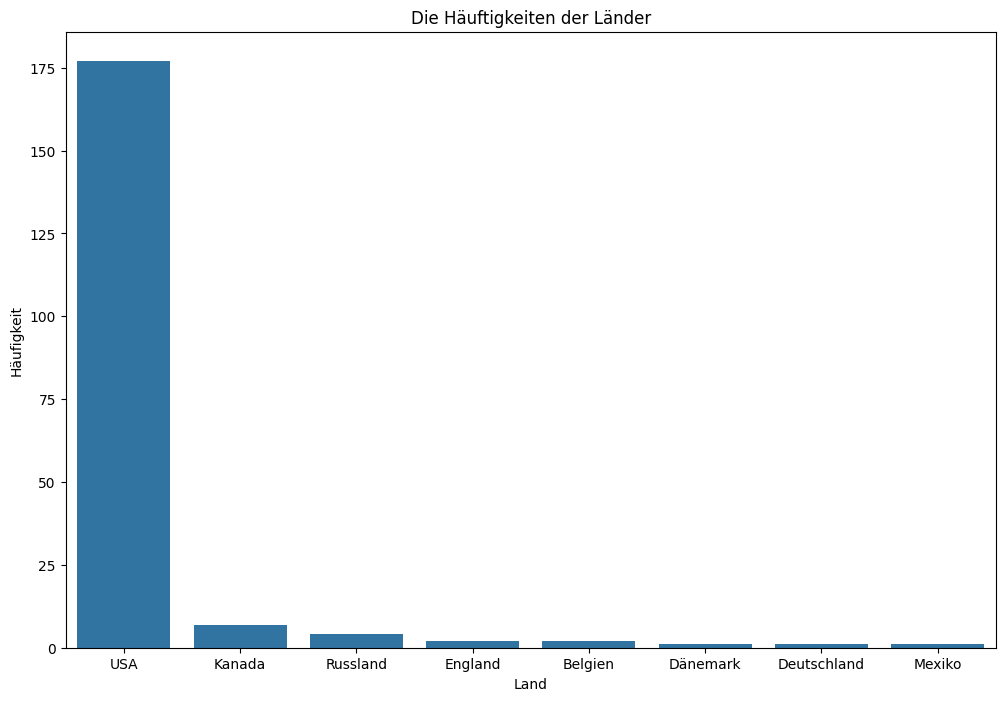

In [153]:
#immob = immob.sort_values(by='Absolute Häuftigkeit', ascending=False)#unnotig. Es ist schon sortiert

# Paretodiagramm erstellen
fig, ax = plt.subplots(figsize=(12,8))

# Balkendiagramm mit Seaborn
sns.barplot(x='Land', y='Absolute Häuftigkeit', data=h_tabelle, color='C0', ax=ax)

# Achsen und Labels
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Land')

# Anzeigen des Diagramms
plt.title('Die Häuftigkeiten der Länder')
plt.show()

**Aufgabe 8**
Erstelle ein Paretodiagramm (siehe Pareto-Prinzip.ipynb
https://bbqberlin.sharepoint.com/:u:/s/B-WI138-U-FI-
240111/EcyCIcNSt6RPl8yAD2ubpyQBjbeGwDENRAmAB7-BrI8bKA?e=U0Rxs2) der
Länder aus Aufgabe 7

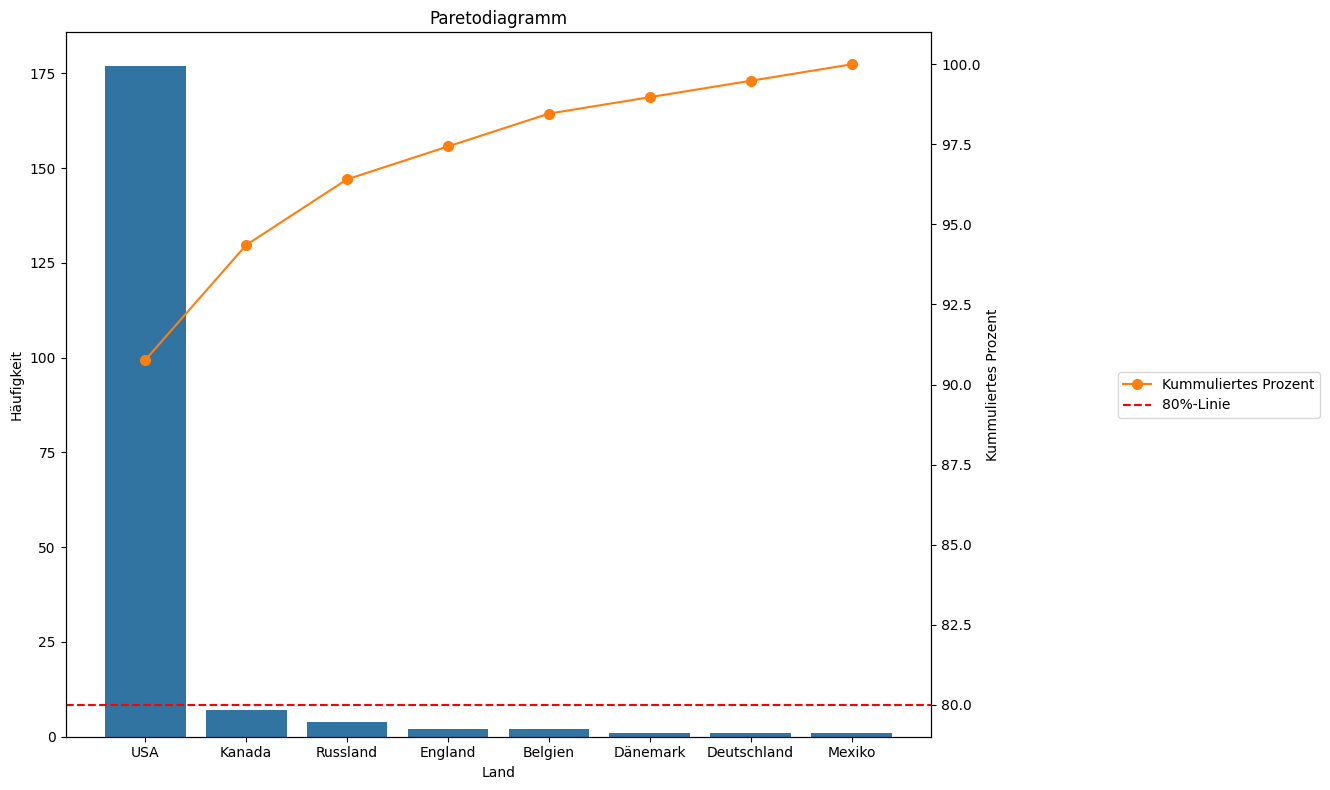

In [152]:
#immob = immob.sort_values(by='Absolute Häuftigkeit', ascending=False)#unnotig. Es ist schon sortiert

# Paretodiagramm erstellen
fig, ax = plt.subplots(figsize=(12,8))

# Balkendiagramm mit Seaborn
sns.barplot(x='Land', y='Absolute Häuftigkeit', data=h_tabelle, color='C0', ax=ax)

# Sekundärachse für die kumulative Prozentlinie
ax2 = ax.twinx()    # erzeugt eine zweite y Achse auf der rechten Seite
ax2.plot(h_tabelle['Land'], h_tabelle['Kummuliertes Prozent'], color='C1', marker='o', ms=7, linestyle='-', label='Kummuliertes Prozent')
ax2.axhline(y=80, color='r', linestyle='--', label='80%-Linie')

# Achsen und Labels
ax.set_ylabel('Häufigkeit')
ax2.set_ylabel('Kummuliertes Prozent')
ax.set_xlabel('Land')

# Legende außerhalb des Plots rechts anzeigen
fig.legend(loc='center', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

# Anzeigen des Diagramms
plt.title('Paretodiagramm')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Platz für die Legende schaffen
plt.show()